<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Импорт-и-проверка-данных" data-toc-modified-id="Импорт-и-проверка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Импорт и проверка данных</a></span><ul class="toc-item"><li><span><a href="#Импорт-данных" data-toc-modified-id="Импорт-данных-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Импорт данных</a></span></li><li><span><a href="#Конвертация-типов-данных" data-toc-modified-id="Конвертация-типов-данных-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Конвертация типов данных</a></span></li><li><span><a href="#Изучение-данных" data-toc-modified-id="Изучение-данных-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Изучение данных</a></span></li><li><span><a href="#Удаление-дубликатов" data-toc-modified-id="Удаление-дубликатов-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Удаление дубликатов</a></span></li></ul></li><li><span><a href="#Обучение-и-валидация-модели" data-toc-modified-id="Обучение-и-валидация-модели-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Обучение и валидация модели</a></span><ul class="toc-item"><li><span><a href="#Вопрос-случайных-величин-и-воспроизводимости-результатов" data-toc-modified-id="Вопрос-случайных-величин-и-воспроизводимости-результатов-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Вопрос случайных величин и воспроизводимости результатов</a></span></li><li><span><a href="#Разделение-и-нормализация-данных" data-toc-modified-id="Разделение-и-нормализация-данных-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Разделение и нормализация данных</a></span></li><li><span><a href="#Поиск-лучшей-модели:-логистическая-регрессия" data-toc-modified-id="Поиск-лучшей-модели:-логистическая-регрессия-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Поиск лучшей модели: логистическая регрессия</a></span></li><li><span><a href="#Поиск-лучшей-модели:-дерево-решений" data-toc-modified-id="Поиск-лучшей-модели:-дерево-решений-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>Поиск лучшей модели: дерево решений</a></span></li><li><span><a href="#Поиск-лучшей-модели:-случайный-лес-деревьев" data-toc-modified-id="Поиск-лучшей-модели:-случайный-лес-деревьев-2.5"><span class="toc-item-num">2.5&nbsp;&nbsp;</span>Поиск лучшей модели: случайный лес деревьев</a></span></li><li><span><a href="#Поиск-лучшей-модели:-k-ближайших-соседей" data-toc-modified-id="Поиск-лучшей-модели:-k-ближайших-соседей-2.6"><span class="toc-item-num">2.6&nbsp;&nbsp;</span>Поиск лучшей модели: k ближайших соседей</a></span></li><li><span><a href="#Выбор-лучшей-модели" data-toc-modified-id="Выбор-лучшей-модели-2.7"><span class="toc-item-num">2.7&nbsp;&nbsp;</span>Выбор лучшей модели</a></span></li><li><span><a href="#Проверка-на-вменяемость" data-toc-modified-id="Проверка-на-вменяемость-2.8"><span class="toc-item-num">2.8&nbsp;&nbsp;</span>Проверка на вменяемость</a></span></li></ul></li><li><span><a href="#Выводы" data-toc-modified-id="Выводы-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Выводы</a></span></li></ul></div>

# Модель рекомендации тарифов

Задача: на основе данных предложить клиенту тариф.

## Импорт и проверка данных

### Импорт данных

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

In [2]:
try:
    df = pd.read_csv("/datasets/users_behavior.csv")
except FileNotFoundError:
    df = pd.read_csv("users_behavior.csv")   ## для открытия на моей машине

Проверим, что с данными все ок

In [3]:
print(df)

      calls  minutes  messages   mb_used  is_ultra
0      40.0   311.90      83.0  19915.42         0
1      85.0   516.75      56.0  22696.96         0
2      77.0   467.66      86.0  21060.45         0
3     106.0   745.53      81.0   8437.39         1
4      66.0   418.74       1.0  14502.75         0
...     ...      ...       ...       ...       ...
3209  122.0   910.98      20.0  35124.90         1
3210   25.0   190.36       0.0   3275.61         0
3211   97.0   634.44      70.0  13974.06         0
3212   64.0   462.32      90.0  31239.78         0
3213   80.0   566.09       6.0  29480.52         1

[3214 rows x 5 columns]


In [4]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3214 entries, 0 to 3213
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   calls     3214 non-null   float64
 1   minutes   3214 non-null   float64
 2   messages  3214 non-null   float64
 3   mb_used   3214 non-null   float64
 4   is_ultra  3214 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 125.7 KB
None


На первый взгляд все ок, но в паре столбцов типы данных можно заменить.

### Конвертация типов данных

In [5]:
df = df.astype({
    "calls":"int32",
    "messages":"int32",
    "is_ultra":"bool"
})

Теперь типы данных лучше соответствуют содержащимся в них величинам.

### Изучение данных

Проверим данные на наличие "хвостов" и аномальных значений при помощи гистограмм.

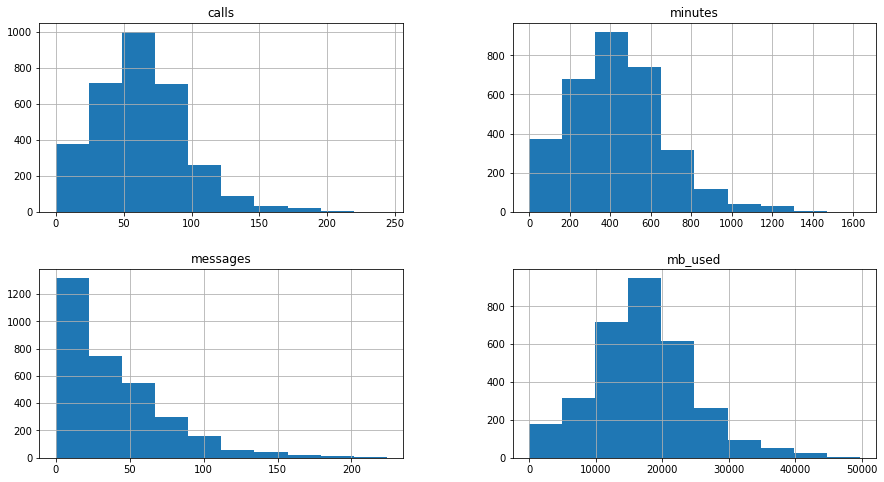

In [6]:
df.hist(figsize=(15,8));

Гистограммы выглядят достойно, аномальных значений и хвостов не наблюдается. Оставим их как есть.

### Удаление дубликатов

На всякий случай проверимся на наличие явных дубликатов, если они есть.

In [7]:
shape_init = df.shape
df.drop_duplicates(inplace=True)
print(
"""
Начальное количество данных: {0}
Конечное количество данных: {1}
Удалено дубликатов: {2}
""".format(
    shape_init[0],
    df.shape[0],
    shape_init[0] - df.shape[0]
)
)


Начальное количество данных: 3214
Конечное количество данных: 3214
Удалено дубликатов: 0



Дубликатов ожидаемо не оказалось.

На этом обработку и изучение данных можно считать завершенными.<br>
Пропусков здесь нет, неявные дубликаты, если и есть, то с этими данными их не найти.

## Обучение и валидация модели

### Вопрос случайных величин и воспроизводимости результатов

Прежде чем начинать делить данные на обучающие и валидационные, нужно определиться с тем, как поступить со случайностью.<br>
Это важно потому что:
1) будет неудобно обоснововать выбор модели, если при каждом обучении будет получаться новый результат

2) есть шанс, что выбранная модель будет неоптимальной

Соотвественно, нужно решить, как поступать со случайностью. Я вижу 3 варианта от более простых к более интересным:
1) Перейти от стохастики к детерминистике зафиксировав сид. Плюс - легко и понятно как работает. Минус - пункт 2 из списка выше остается открытым.

2) Перебрать множество заранее определенных сидов (псевдослучайная генерация). Плюс - все еще легко и понятно как работает, шанс выбрать оптимальную модель существенно выше в сравнении с предыдущим вариантом. Минус - шанс выбрать неоптимальную модель все еще остается.

3) Метод Монте-Карло. Насэмплить множество случайных вариантов, построить распределения точности получившихся моделей, на основании этих распределний выбрать оптимальную модель и гиперпараметры. Плюсы - позволяет хорошо прочувствовать чувствительность моделей к изменению гиперпараметров и диапазоны возможных точностей. Минусы - можно долго ждать исполнения кода и для "красивой" реализации разделение данных должно быть вложено внутрь, что несколько противоречит формулировке задания.

Из всех методов выше, думаю, пойти путем под номером <b>2</b>.
Он, с одной стороны будет полностью воспроизводимым, а с другой стороны, существенно увеличит шанс найти удачный сид.

Для псевдослучайной генерации будем использовать вот такую случайно сгенерированную глобальную таблицу размером в 250 элементов:

In [8]:
## RTG - Random Table Global
rtg = [6625, 1954, 5598, 7674, 5851, 9515, 3514, 9765, 2522, 7484, 7919, 5445, 1788, 2829, 7421, 7007, 3554, 2421, 3628, 3978, 5700, 1473, 1167, 2905, 8908, 1957, 6868, 6341, 1483, 9884, 9873, 3405, 3247, 5413, 5576, 7181, 7021, 1437, 8786, 1460, 2548, 8816, 9620, 9508, 7437, 1913, 9167, 9474, 1843, 4092, 6047, 2341, 8529, 2365, 1997, 8608, 7291, 3981, 3846, 4068, 2787, 5765, 6648, 1485, 5835, 5541, 7470, 8977, 4681, 4001, 7963, 6056, 6948, 4289, 1945, 4012, 4388, 5257, 6566, 4568, 3493, 9756, 3391, 1066, 1815, 4729, 7058, 6113, 8075, 2868, 9482, 2348, 2617, 4954, 8693, 2359, 7228, 1875, 1063, 1814, 6477, 9099, 4390, 1625, 7627, 6669, 5113, 2148, 1519, 4518, 5720, 2934, 3800, 7628, 9632, 8250, 1102, 5275, 3057, 4061, 2260, 3477, 6055, 3304, 4907, 5534, 7632, 2903, 9441, 7503, 8769, 2889, 6859, 1556, 4668, 4650, 2249, 3817, 7453, 1063, 4446, 1646, 4061, 2998, 8059, 5654, 5127, 5233, 9315, 9333, 3733, 7039, 1322, 3530, 9911, 6127, 7449, 1696, 9607, 4715, 1279, 4982, 8797, 7541, 2236, 1251, 2895, 2479, 9195, 2956, 2341, 9857, 6059, 6727, 4032, 3104, 7528, 1028, 4142, 3166, 6842, 9669, 1336, 6969, 3858, 8116, 2717, 9077, 4091, 5275, 5187, 4033, 7552, 5731, 2922, 9854, 4568, 9767, 5328, 3209, 1567, 8390, 8329, 6014, 9025, 3830, 4807, 9320, 7111, 2959, 5158, 5319, 2021, 1812, 7383, 8543, 6897, 6358, 7757, 1453, 9996, 5093, 6138, 8272, 7466, 3983, 9398, 8391, 1751, 7979, 9796, 8963, 3359, 9945, 3370, 4680, 5013, 2539, 5217, 3344, 5441, 5005, 2009, 8154, 7390, 8848, 6509, 3055, 2089, 9979]

План действий следующий:
1) Делим данные

2) Выбираем по одной модели каждого алгоритма по результатам проверки на валидационной выборке

3) Каждой из выбранных моделей даем тестовую выборку, та, что справится лучше и будет финальным выбором

### Разделение и нормализация данных

Как я уже написал выше, хорошо бы вложить разделение датасета в цикл, но это несколько противоречит формулировке задания. <br>
Поэтому, датасет разделим по первому сиду таблицы выше.
Делить будем в пропорции

Обучающая - Валидационная - Тестовая

    .6    -      .2       -   .2

Но прежде чем делить данные их неплохо было бы нормализовать. Сделать это стоит потому что один из возможных кандидатов моделей - логистическая регрессия, а она работает не слишком хорошо, если диапазоны значений различных фич слишком непохожи друг на друга.
К тому же, деревьям решений совершенно без разницы, отнормированы данные или нет, на их работу это не отразится.

Для нормализации будем использовать MinMaxScaler() - 3 столбца из 4 уже имеют распределение, похожее на нормальное, этот тип скейлинга сохранит характер распределений.

In [9]:
## Скейлинг данных
scaler = MinMaxScaler()
df_scaled = scaler.fit_transform(df)
df_scaled = pd.DataFrame(df_scaled, columns=df.columns)

df_scaled["is_ultra"] = df_scaled["is_ultra"].astype("bool")
target = df_scaled["is_ultra"]
features = df_scaled.drop("is_ultra", axis=1)

## Выделение обучающей выборки
features_train, features_remains, target_train, target_remains = train_test_split(
    features, target, test_size=.4, random_state=rtg[0]
)

## Разделение остатка на валидационную и тестовую выборки

features_valid, features_test, target_valid, target_test = train_test_split(
    features_remains, target_remains, test_size=.5, random_state=rtg[0]
)

#print(target)
#print(features_train.info())
#print(features_valid.info())
#print(features_test.info())

### Поиск лучшей модели: логистическая регрессия

Для логистической регрессии основной гиперпараметр - солвер, их и будем перебирать.

Часть солверов детерминистические, их проверим в первую очередь. Стохастические солверы проверим на разных сидах.

In [10]:
## LR - Logistic Regression
## Здесь будет храниться лучшая найденная модель в категории и интересующие параметры
best_model_container_lr = {
    "model":None,
    "accuracy":0
}

## Детерминистические солверы
for solver in ["lbfgs", "newton-cg"]:
    logistic_regression_model = LogisticRegression(solver=solver)
    logistic_regression_model.fit(features_train, target_train)
    prediction_lr = logistic_regression_model.predict(features_valid)
    
    accuracy_lr = accuracy_score(target_valid, prediction_lr)
    
    if accuracy_lr > best_model_container_lr["accuracy"]:
        best_model_container_lr["model"] = logistic_regression_model
        best_model_container_lr["accuracy"] = accuracy_lr

## Стохастические солверы
for solver in ["sag", "saga", "liblinear"]:
    for seed in rtg:
        logistic_regression_model = LogisticRegression(solver=solver, random_state=seed)
        logistic_regression_model.fit(features_train, target_train)
        prediction_lr = logistic_regression_model.predict(features_valid)
    
        accuracy_lr = accuracy_score(target_valid, prediction_lr)
    
        if accuracy_lr > best_model_container_lr["accuracy"]:
            best_model_container_lr["model"] = logistic_regression_model
            best_model_container_lr["accuracy"] = accuracy_lr
        #print(solver, seed, accuracy_lr)

print(
f"""Лучшая модель и ее параметры: 
{best_model_container_lr["model"]}

Имеет следующую точность:
{best_model_container_lr["accuracy"]:.4f}
""")

Лучшая модель и ее параметры: 
LogisticRegression()

Имеет следующую точность:
0.7652



Наилучший результат получился у солвера LBFGS, теперь посмотрим, что получится с деревьями решений.

### Поиск лучшей модели: дерево решений

Деревья склонны к переобучению, поэтому стоит найти гиперпараметры, которые позволят этого избежать. Это в первую очередь глубина дерева и количество листьев, их и будем перебирать.

Лучшая модель и ее параметры: 
DecisionTreeClassifier(max_depth=3, max_leaf_nodes=4, random_state=6625)

Имеет следующую точность:
0.7978

И следующий вид:


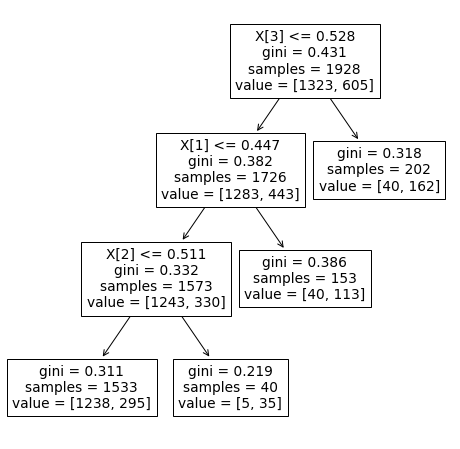

In [11]:
## DT - Decision Tree
## Здесь будет храниться лучшая найденная модель в категории и интересующие параметры
best_model_container_dt = {
    "model":None,
    "accuracy":0
}

for seed in rtg:
    for max_nodes in range(2, 12):
        for depth in range(1, 4):
            decision_tree_model = DecisionTreeClassifier(max_leaf_nodes=max_nodes, random_state=seed, max_depth=depth)
            decision_tree_model.fit(features_train, target_train)
            prediction_dt = decision_tree_model.predict(features_valid)
    
            accuracy_dt = accuracy_score(target_valid, prediction_dt)
    
            if accuracy_dt > best_model_container_dt["accuracy"]:
                best_model_container_dt["model"] = decision_tree_model
                best_model_container_dt["accuracy"] = accuracy_dt

print(
f"""Лучшая модель и ее параметры: 
{best_model_container_dt["model"]}

Имеет следующую точность:
{best_model_container_dt["accuracy"]:.4f}
""")

print("И следующий вид:")
plt.figure(figsize=(8, 8))
plot_tree(best_model_container_dt["model"]);

Результат лучше, чем у логистической регрессии, посмотрим, удастся ли его улучшить случайным лесом.

### Поиск лучшей модели: случайный лес деревьев

Гиперпараметры здесь все те же, что и в предыдущем пункте, только добавляется количество деревьев в лесу.

In [12]:
## RF - Random Forest
## Здесь будет храниться лучшая найденная модель в категории и интересующие параметры
best_model_container_rf = {
    "model":None,
    "accuracy":0
}

for seed in rtg[:5]:    ## Ограничимся 5-ю первыми сидами, иначе исполнения кода можно ждать долго
    for forest_size in range(2, 20):
        for max_nodes in range(2, 12):
            for depth in range(1, 4):
                random_forest_model = RandomForestClassifier(n_estimators=forest_size,
                                                             max_leaf_nodes=max_nodes, random_state=seed, max_depth=depth
                                                            )
                random_forest_model.fit(features_train, target_train)
                prediction_rf = random_forest_model.predict(features_valid)
    
                accuracy_rf = accuracy_score(target_valid, prediction_rf)
    
                if accuracy_rf > best_model_container_rf["accuracy"]:
                    best_model_container_rf["model"] = random_forest_model
                    best_model_container_rf["accuracy"] = accuracy_rf

print(
f"""Лучшая модель и ее параметры: 
{best_model_container_rf["model"]}

Имеет следующую точность:
{best_model_container_rf["accuracy"]:.4f}
""")

Лучшая модель и ее параметры: 
RandomForestClassifier(max_depth=3, max_leaf_nodes=8, n_estimators=18,
                       random_state=7674)

Имеет следующую точность:
0.8072



Еще небольшой прирост в точности относительно единственного дерева.

### Поиск лучшей модели: k ближайших соседей

Метод полностю детерминистический, поэтому сидов здесь не будет. А вот что будет, так это определение оптимального количества ближайших соседей.

In [13]:
## knn - k Nearest Neighbours
## Здесь будет храниться лучшая найденная модель в категории и интересующие параметры
best_model_container_knn = {
    "model":None,
    "accuracy":0
}

for neighbours in range(3, 30):
    knn_model = KNeighborsClassifier(n_neighbors=neighbours)
    knn_model.fit(features_train, target_train)
    prediction_knn = knn_model.predict(features_valid)
    
    accuracy_knn = accuracy_score(target_valid, prediction_knn)
    
    if accuracy_knn > best_model_container_knn["accuracy"]:
        best_model_container_knn["model"] = knn_model
        best_model_container_knn["accuracy"] = accuracy_knn

print(
f"""Лучшая модель и ее параметры: 
{best_model_container_knn["model"]}

Имеет следующую точность:
{best_model_container_knn["accuracy"]:.4f}
""")

/opt/conda/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:211: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/opt/conda/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:211: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to Tr

Лучшая модель и ее параметры: 
KNeighborsClassifier(n_neighbors=18)

Имеет следующую точность:
0.8165



/opt/conda/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:211: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/opt/conda/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:211: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to Tr

Выглядит как самая точная модель, интересно, как она себя покажет на тестовой выборке.

Теперь остается только сделать финальную проверку на тестовой выборке и определиться с тем, какая модель будет рабочей.

### Выбор лучшей модели

Дадим каждой из 4-х лучших моделей тестовую выборку и посмотрим, как они справятся. Модель с лучшим показателем точности и будет финальной.

/opt/conda/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:211: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)



    Модель
    LogisticRegression()
    Точность:
    0.7434
    

    Модель
    DecisionTreeClassifier(max_depth=3, max_leaf_nodes=4, random_state=6625)
    Точность:
    0.7807
    

    Модель
    RandomForestClassifier(max_depth=3, max_leaf_nodes=8, n_estimators=18,
                       random_state=7674)
    Точность:
    0.7792
    

    Модель
    KNeighborsClassifier(n_neighbors=18)
    Точность:
    0.7807
    


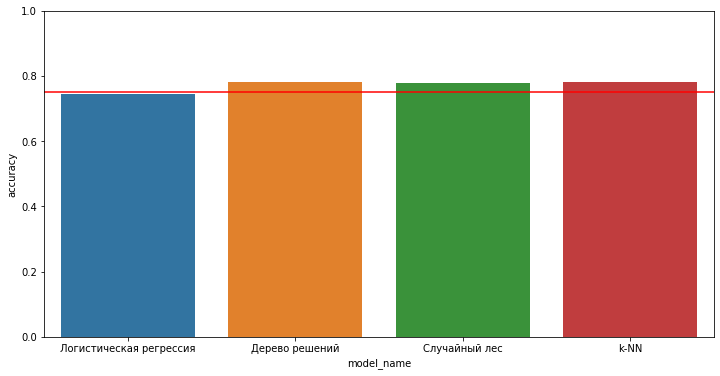

In [14]:
accuracies = []
model_names = ["Логистическая регрессия", "Дерево решений", "Случайный лес", "k-NN"]

for model in [best_model_container_lr["model"], best_model_container_dt["model"],
              best_model_container_rf["model"], best_model_container_knn["model"]]:
    prediction = model.predict(features_test)
    accuracy = accuracy_score(target_test, prediction)
    accuracies.append(accuracy)
    
    print(
    f"""
    Модель
    {model}
    Точность:
    {accuracy:.4f}
    """
    )


accuracies = pd.DataFrame(data={"accuracy":accuracies, "model_name":model_names})

plt.figure(figsize=(12, 6))
plt.axhline(.75, color="red")
plt.ylim(0, 1)
sns.barplot(data=accuracies, x="model_name", y="accuracy");

Логистическая регрессия не проходит по критерию точности задания (<.75). Остальные три дают в целом сравнимые результаты. Любопытно, что kNN и дерево дали абсолютно одинаковую точность.

### Проверка на вменяемость

В качестве проверки на вменяемость используем случайно сгенерированные значения. В нашем (бинарном) случае такая "модель" должна иметь точность около .5. Сейчас и проверим.

In [15]:
random_array = np.random.randint(0, high=2, size=target_test.shape[0], dtype="bool")
#print(random_array.shape[0])

accuracy_rnd = accuracy_score(target_test, random_array)
print(f"Точность случайной модели: {accuracy_rnd:.4f}" )

Точность случайной модели: 0.4743


Как и ожидалось, получили результат близкий к .5. Он может отличаться до .05 в каждую сторону, но в среднем около .5 и получается.

Из этого можно сделать вывод, что все обученные модели предсказывают интересующий нас параметр существенно лучше, чем случайный метод.

## Выводы

* Исходный датасет был разделен на обучающую, валидационную и тестовую выборки в пропорции 60% - 20% - 20% соответственно.
* На обучающих выборках были обучены модели:
    * Логистическая регрессия
    * Дерево решений
    * Случайный лес деревьев решений
    * k ближайших соседей
* Для каждой из моделей были подобраны гиперпараметры, дающие максимальную точность при проверке на валидационной выборке.
* По результатам проверки на тестовой выборке модель логистической регрессии показала точность (.7434) ниже пороговой (.75). Остальные модели показали сравнимую друг с другом точность (.7792 - .7807).
.
<img src=attachment:Accuracy_barplot.PNG width="600" height="500">
* Поскольку среди моделей, удовлетворяющих критерию точности, значения точности значительно друг от друга не отличаются, их можно считать равноценными и любая из них может быть использована как итоговая.
* Все обученные модели прошли проверку на вменяемость, а именно, показали точность значительно выше, чем случайное предсказание.
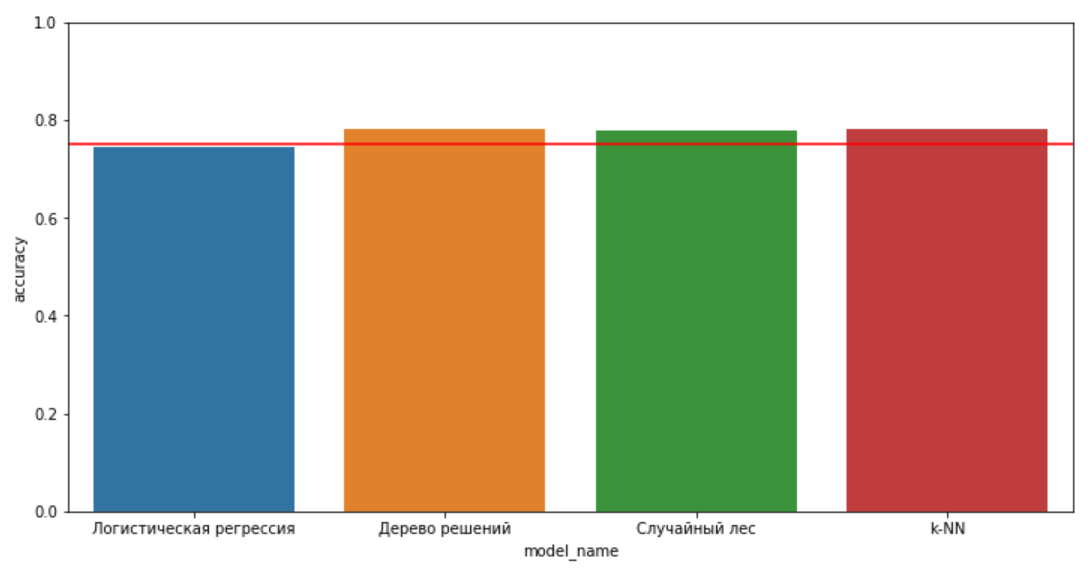